In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import date2num
import datetime
import scipy.stats as stats

In [2]:
# Step 1: Simulate Price and Volume Data
np.random.seed(42)
time_intervals = 60  # 60 time intervals in a day
price = np.random.normal(loc=100, scale=2, size=time_intervals)  # Simulated prices
volume = np.random.randint(100, 1000, size=time_intervals)  # Simulated volumes
timestamps = [datetime.datetime(2024, 8, 12, 9 + i//4, i%4*15) for i in range(time_intervals)]  # Simulated timestamps

In [3]:
# Create a DataFrame to hold the data
data = pd.DataFrame({'Timestamp': timestamps, 'Price': price, 'Volume': volume})
data.set_index('Timestamp', inplace=True)

In [4]:
# Step 2: Calculate VWAP
data['VWAP'] = (data['Price'] * data['Volume']).cumsum() / data['Volume'].cumsum()

In [5]:
# Step 3: Implement VWAP Algorithm with Market Impact
total_order = 10000
order_slices = []
executed_prices = []

In [6]:
# Simulate market impact
market_impact = np.random.uniform(0.01, 0.05, size=time_intervals)  # Simulated impact per interval

In [7]:
for i in range(time_intervals):
    slice_size = (data['Volume'][i] / data['Volume'].sum()) * total_order
    # Adjust slice size for market impact
    adjusted_slice_size = slice_size * (1 + market_impact[i])
    order_slices.append(adjusted_slice_size)
    executed_prices.append(data['Price'][i] * (1 + market_impact[i]))  # Adjust price for market impact

C:\Users\TB Pal\AppData\Local\Temp\ipykernel_58988\1713712958.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slice_size = (data['Volume'][i] / data['Volume'].sum()) * total_order
C:\Users\TB Pal\AppData\Local\Temp\ipykernel_58988\1713712958.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  executed_prices.append(data['Price'][i] * (1 + market_impact[i]))  # Adjust price for market impact


In [8]:
data['Order Slices'] = order_slices
data['Executed Price'] = executed_prices

In [9]:
# Calculate Execution Error
data['VWAP Error'] = abs(data['VWAP'] - data['Executed Price'])

In [10]:
# Time-Based Adjustment
data['Time'] = [t.hour + t.minute / 60 for t in data.index]  # Convert time to hours
data['Time-Based Adjustment'] = np.sin(data['Time'] * np.pi / 12)  # Simulated time-based effect

In [11]:
# Enhanced Order Adjustment
def advanced_order_strategy(data, threshold=0.05):
    """ Adjust order slices based on VWAP deviation and market impact. """
    adjusted_slices = []
    for i in range(len(data)):
        base_slice = data['Order Slices'][i]
        if data['VWAP Error'][i] > threshold:
            adjusted_slice_size = base_slice * 1.1 * (1 + market_impact[i])
        else:
            adjusted_slice_size = base_slice * 0.9 * (1 - market_impact[i])
        adjusted_slices.append(adjusted_slice_size)
    return adjusted_slices

In [12]:
data['Adjusted Order Slices'] = advanced_order_strategy(data)

C:\Users\TB Pal\AppData\Local\Temp\ipykernel_58988\1084044702.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  base_slice = data['Order Slices'][i]
C:\Users\TB Pal\AppData\Local\Temp\ipykernel_58988\1084044702.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['VWAP Error'][i] > threshold:


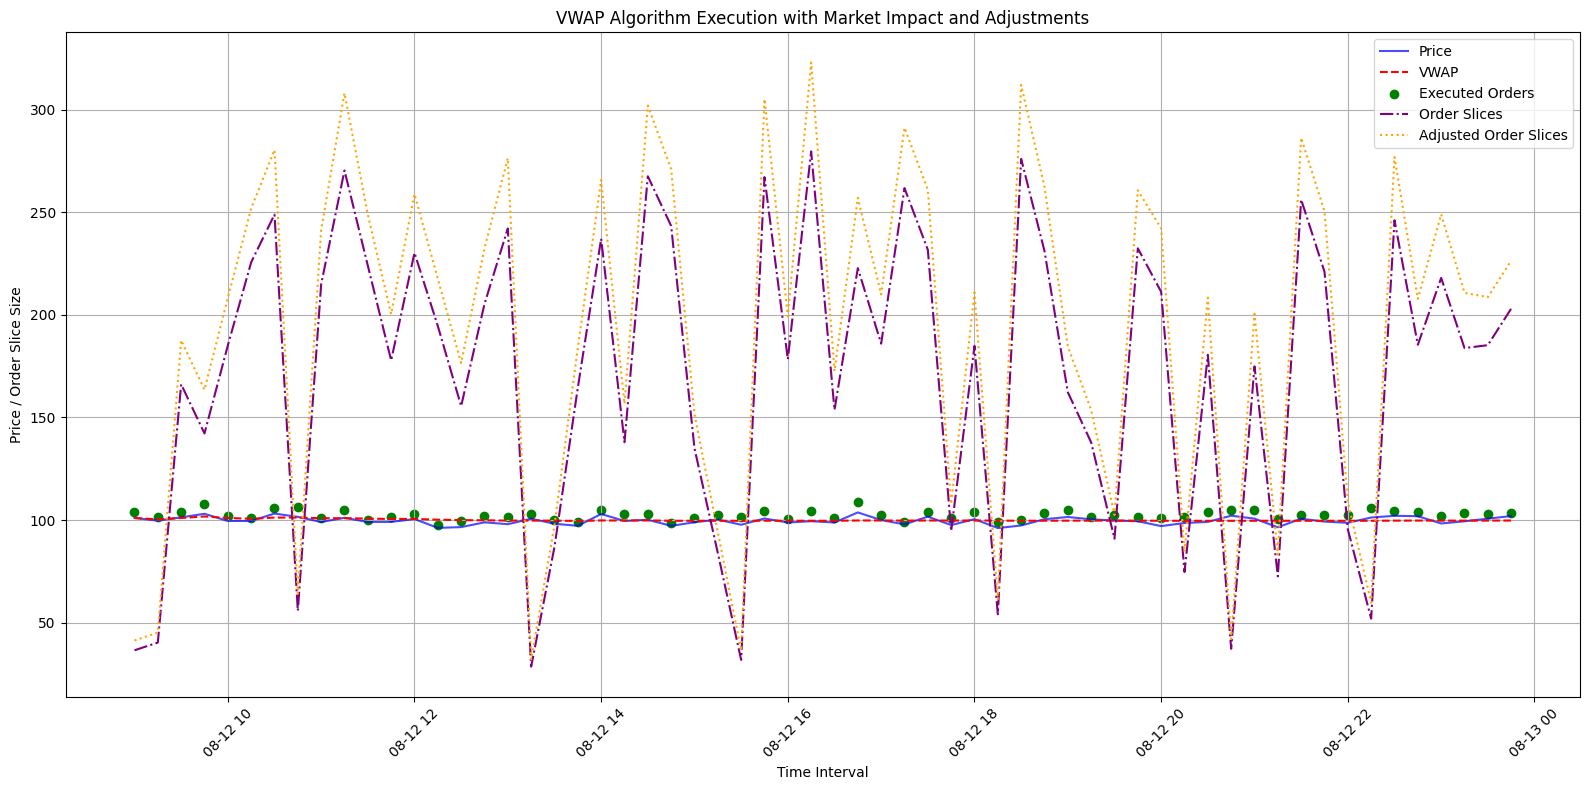

In [13]:
# Step 4: Visualization
# Plotting the VWAP, price, executed orders, and market impact
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['Price'], label='Price', color='blue', alpha=0.7)
plt.plot(data.index, data['VWAP'], label='VWAP', color='red', linestyle='--')
plt.scatter(data.index, data['Executed Price'], label='Executed Orders', color='green', marker='o')
plt.plot(data.index, data['Order Slices'], label='Order Slices', color='purple', linestyle='-.')
plt.plot(data.index, data['Adjusted Order Slices'], label='Adjusted Order Slices', color='orange', linestyle=':')
plt.title('VWAP Algorithm Execution with Market Impact and Adjustments')
plt.xlabel('Time Interval')
plt.ylabel('Price / Order Slice Size')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

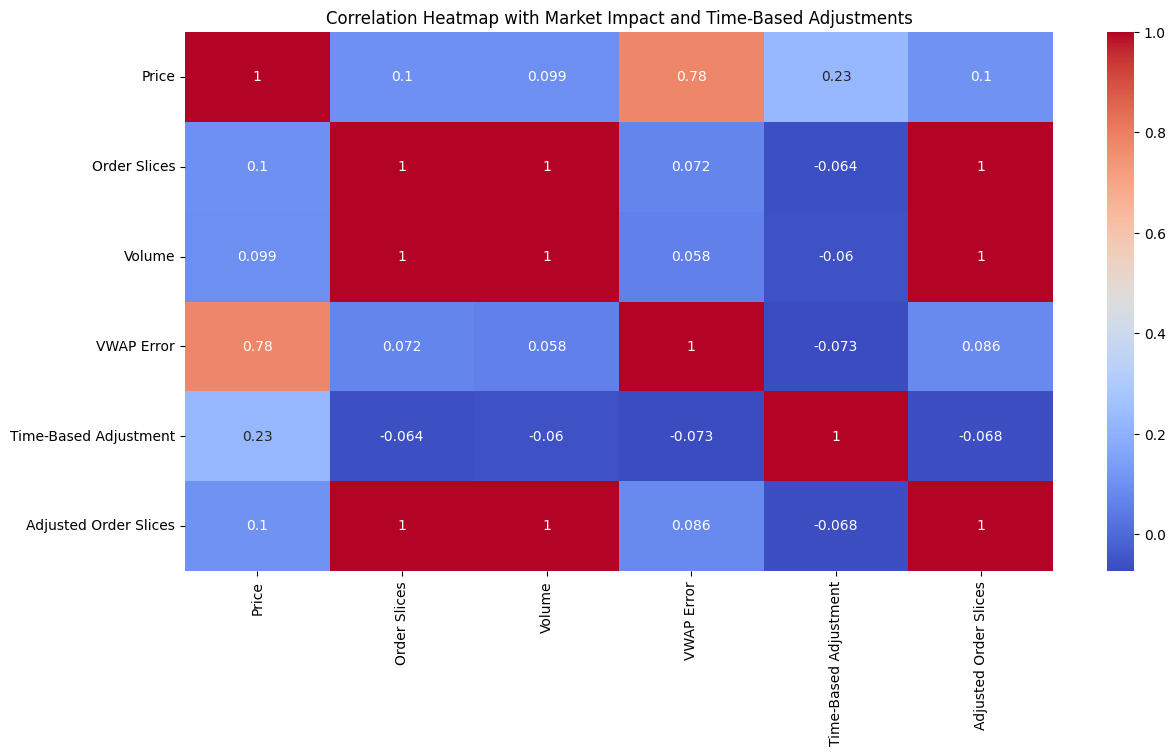

In [14]:
# Heatmap of Correlations including Market Impact and Time-Based Adjustments
plt.figure(figsize=(14, 7))
sns.heatmap(data[['Price', 'Order Slices', 'Volume', 'VWAP Error', 'Time-Based Adjustment', 'Adjusted Order Slices']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Market Impact and Time-Based Adjustments')
plt.show()

In [15]:
# Additional Statistical Analysis
print("First 5 rows of data:\n", data.head())
print("\nVWAP Calculation:\n", data[['Price', 'VWAP']].head())
print("\nOrder Slices:\n", data['Order Slices'].head())
print("\nAdjusted Order Slices:\n", data['Adjusted Order Slices'].head())
print("\nExecution Errors:\n", data[['VWAP Error']].head())

First 5 rows of data:
                           Price  Volume        VWAP  Order Slices  \
Timestamp                                                           
2024-08-12 09:00:00  100.993428     132  100.993428     36.489637   
2024-08-12 09:15:00   99.723471     147  100.324311     40.259814   
2024-08-12 09:30:00  101.295377     602  100.987855    166.155754   
2024-08-12 09:45:00  103.046060     506  101.738721    142.198993   
2024-08-12 10:00:00   99.531693     673  101.017687    185.085186   

                     Executed Price  VWAP Error   Time  Time-Based Adjustment  \
Timestamp                                                                       
2024-08-12 09:00:00      103.847642    2.854214   9.00               0.707107   
2024-08-12 09:15:00      101.592052    1.267740   9.25               0.659346   
2024-08-12 09:30:00      103.995952    3.008098   9.50               0.608761   
2024-08-12 09:45:00      107.717262    5.978541   9.75               0.555570   
2024-08

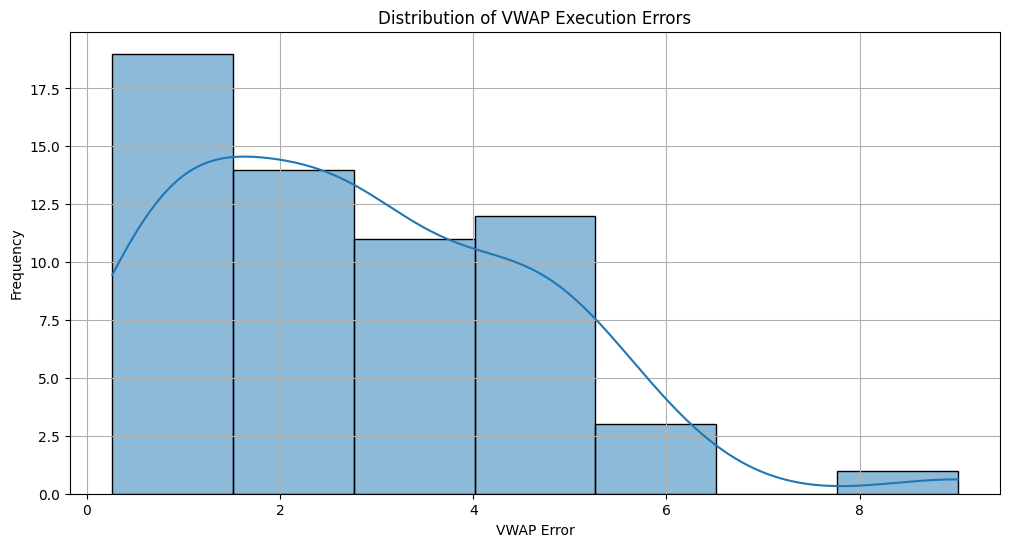

In [16]:
# Advanced Statistical Analysis - Distribution of Execution Errors
plt.figure(figsize=(12, 6))
sns.histplot(data['VWAP Error'], kde=True)
plt.title('Distribution of VWAP Execution Errors')
plt.xlabel('VWAP Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()